In [ ]:
#### importing library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
mlp.style.use('ggplot')


In [ ]:
#### importing dataset

In [2]:
df=pd.read_csv('Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#### shaoe of dataset

In [3]:
df.shape

(150, 6)

In [4]:
print('number of columns in dataset is ',df.shape[1])
print('number of rows in dataset is ',df.shape[0])

number of columns in dataset is  6
number of rows in dataset is  150


In [5]:
df=df.drop('Id',axis=1)

In [6]:
print('number of columns in dataset is ',df.shape[1])
print('number of rows in dataset is ',df.shape[0])

number of columns in dataset is  5
number of rows in dataset is  150


In [ ]:
#### checking on target column

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

lr=LabelEncoder()

In [9]:
#df['Species']=lr.fit_transform(df['Species'])

In [10]:
#df['Species'].value_counts()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* NO NULL VALUES PRESENT IN THIS DATASET 
* WE ARE GOOD TO GO FOR DATASET

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


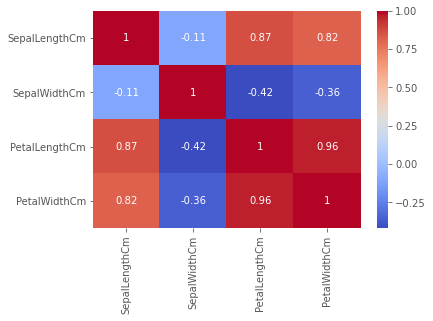

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [15]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

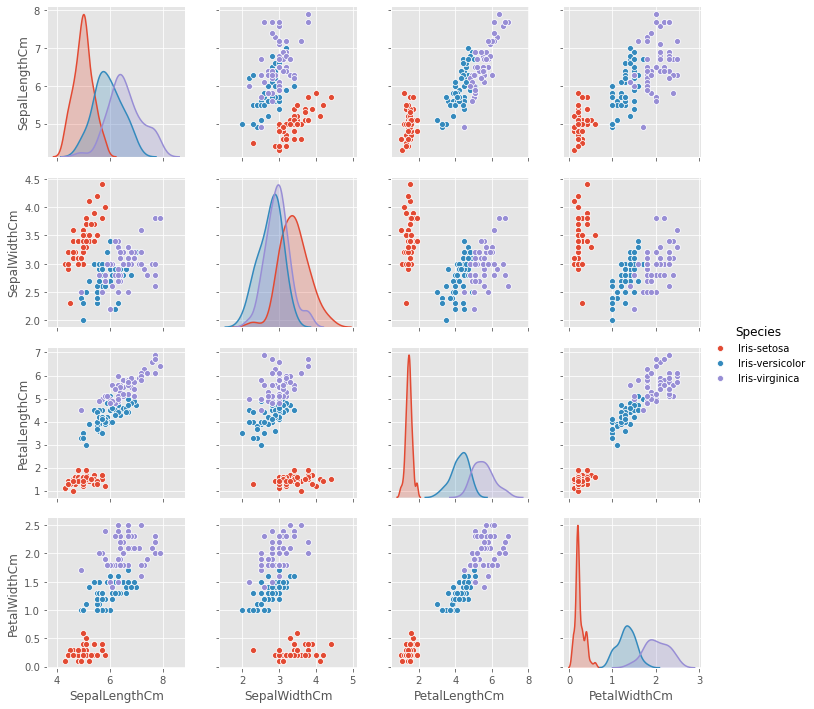

In [16]:
sns.pairplot(df,hue='Species')
plt.show()

In [17]:
X=df.drop('Species',axis=1)
y=df['Species']

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [19]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

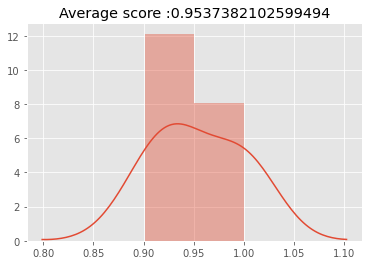

In [30]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(dt, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

In [20]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

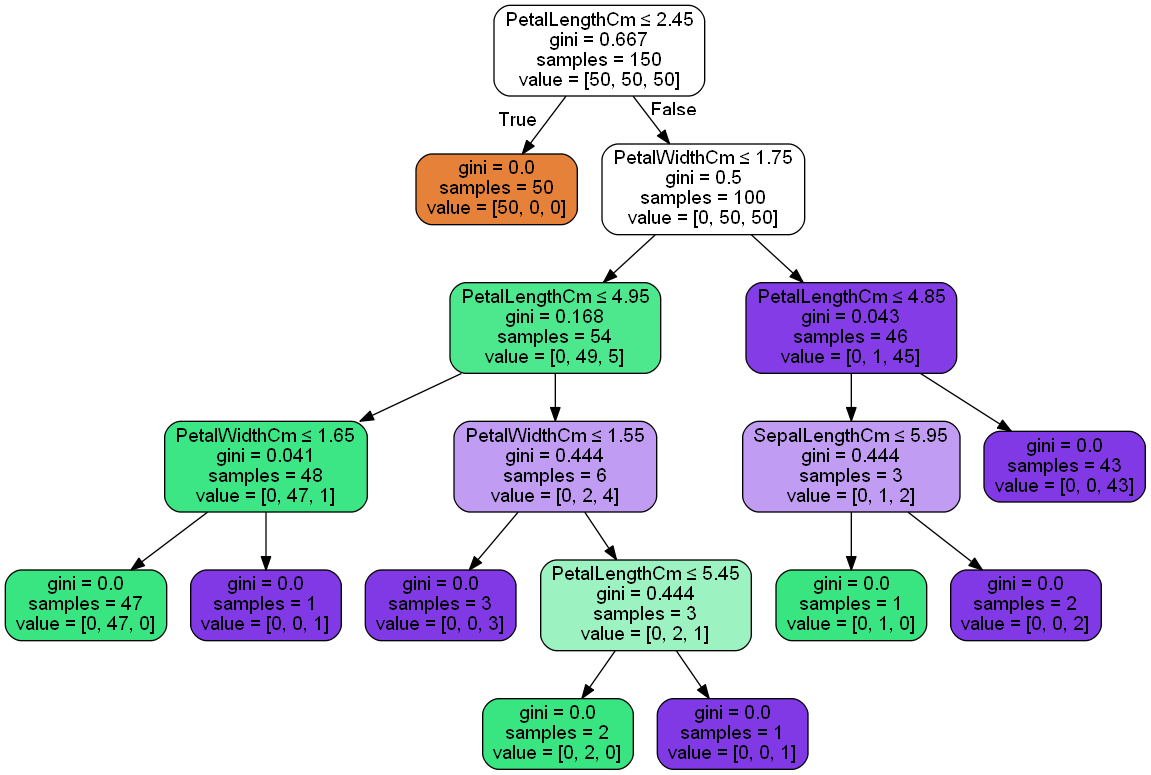

In [23]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### DT Using Gridsearch and kfold

In [24]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

In [25]:
auc_avg = []
auc_var = []
for ne in np.arange(1,10):
    DT = DecisionTreeClassifier(random_state = 0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(DT, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))

In [26]:
print('Min Bias Error:',np.min(auc_avg),' n_estimator:',np.argmin(auc_avg)+1,' Variance Error:',auc_var[np.argmin(auc_avg)])
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))

Min Bias Error: 0.052897181638600466  n_estimator: 1  Variance Error: 0.0025050355815153026
Bias Error: 0.052897181638600466  n_estimator: 1 Min Variance Error: 0.0025050355815153026


In [27]:
DT.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

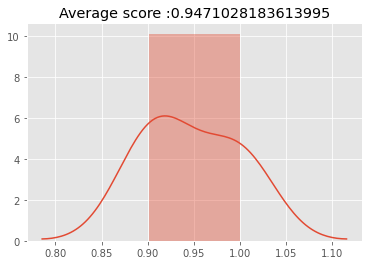

In [28]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
results = cross_val_score(DT, X, y, cv=kfold, scoring='f1_weighted',n_jobs=-1)
sns.distplot(results)
plt.title('Average score :{}'.format(np.mean(results)))
plt.show()

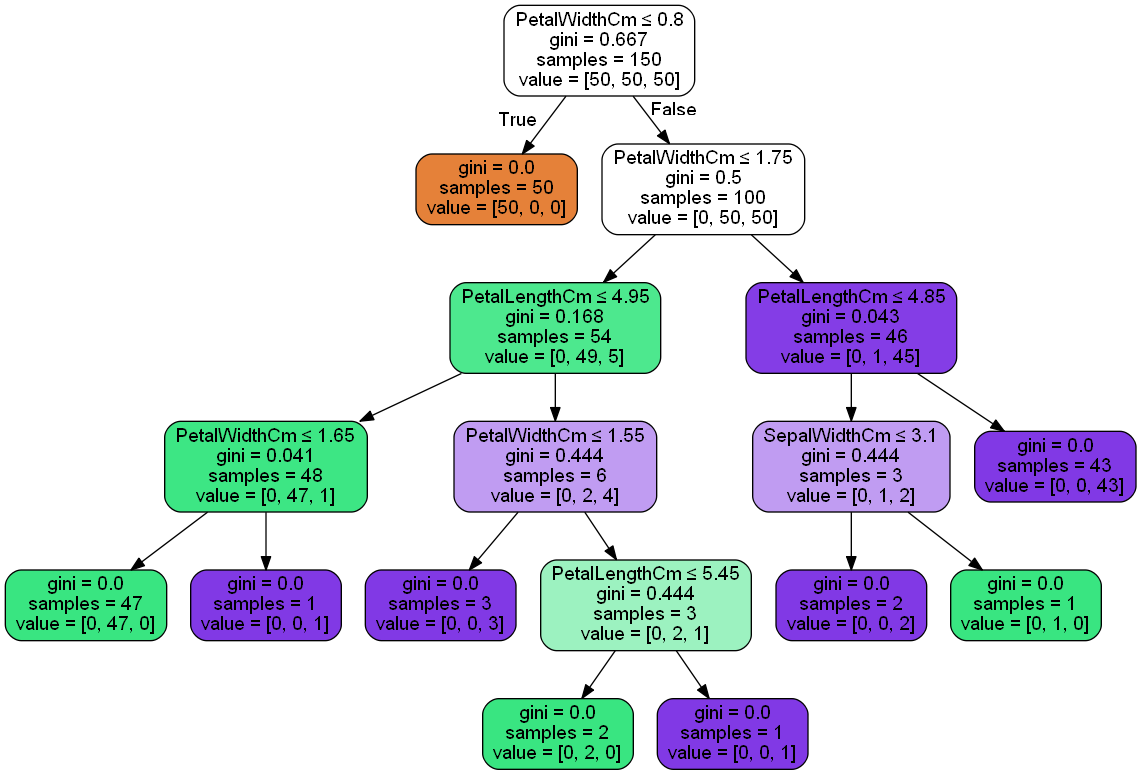

In [29]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())